# ESG Score Prediction

## Notebook Outline :

1. Introduction (ESG Score, Calculation method, Factors - Summary based on the TR pdf)
2. Data Explanation (Features - what they are)
3. Data Processing - Outlier Detection, Feature Transformation 
4. EDA - Basic Insights
6. Feature Selection/Importance
5. Data Modelling

## 1. Introduction 

A financial statement lists the assets, liabilities and equity of a company at a specific point in time and is used to calculate the net worth of a business. A basic tenet of double-entry book-keeping is that total assets (what a business owns) must equal liabilities plus equity (how the assets are financed). In other words, the balance sheet must balance. Subtracting liabilities from assets shows the net worth of the business. 

How does ESG score come into picture in a business?
(TBD by Aheli)


## 2. Data Explanation  

### Total Current Assets 
Current assets are cash or its equivalent or those assets that will be used by the business in a year or less

### Total Current Liabilities 
Debts that are due in one year or less are classified as current liabilities. If they're due in more than one year, they're long-term liabilities.

### Total Debt 
Total debt refers to the sum of borrowed money that your business owes. It’s calculated by adding together your current and long-term liabilities.

### Total Assets Reported 
"Total long-term assets" is the sum of capital and plant, investments, and miscellaneous assets.
"Total assets" is the sum of total current assets and total long-term assets

### Net Income - Actual 
Net income refers to the amount an individual or business makes after deducting costs, allowances and taxes.
In commerce, net income is what the business has left over after all expenses, including salary and wages, cost of goods or raw material and taxes. 

### Revenue Per Share
1. Earnings per share (EPS) is a company's net profit divided by the number of common shares it has outstanding.
2. EPS indicates how much money a company makes for each share of its stock and is a widely used metric for estimating corporate value.
3. A higher EPS indicates greater value because investors will pay more for a company's shares if they think the company has higher profits relative to its share price.
4. EPS can be arrived at in several forms, such as excluding extraordinary items or discontinued operations, or on a diluted basis.
5. Like other financial metrics, earnings per share is most valuable when compared against competitor metrics, companies of the same industry, or across a period of time.

### Total Revenue 
Total revenue is the amount of money a company brings in from selling its goods and services. In other words, company's use this metric to determine how well they're generating money from their core revenue-driving operations.

### Total Equity 
The total equity of a business is derived by subtracting its liabilities from its assets. The information for this calculation can be found on a company's balance sheet, which is one of its financial statements. 
An alternative approach for calculating total equity is to add up all of the line items in the stockholders' equity section of the balance sheet, which is comprised of common stock, additional paid-in capital, and retained earnings, minus treasury stock.
In essence, total equity is the amount invested in a company by investors in exchange for stock, plus all subsequent earnings of the business, minus all subsequent dividends paid out. Many smaller businesses are strapped for cash and so have never paid any dividends. In their case, total equity is simply invested funds plus all subsequent earnings.

### Company Market Capitilization 
Market cap—or market capitalization—refers to the total value of all a company's shares of stock. It is calculated by multiplying the price of a stock by its total number of outstanding shares. For example, a company with 20 million shares selling at $50 a share would have a market cap of $1 billion.

Why is market capitalization such an important concept? It allows investors to understand the relative size of one company versus another. Market cap measures what a company is worth on the open market, as well as the market's perception of its future prospects, because it reflects what investors are willing to pay for its stock.

### Property Plant And Equipment, Total - Gross
Carrying amount at the balance sheet date for long-lived physical assets used in the normal conduct of business and not intended for resale. This can include land, physical structures, machinery, vehicles, furniture, computer equipment, construction in progress, and similar items.

### P/E Ratio
The price/earnings (P/E) ratio, also known as an “earnings multiple,” is one of the most popular valuation measures used by investors and analysts. The basic definition of a P/E ratio is stock price divided by earnings per share (EPS)


## 3. Data Exploration

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [2]:
df_firm = pd.read_csv("raw_data.csv")

In [3]:
df_firm.head()

,RIC,Date,Total Current Assets,Total Current Liabilities,Total Debt,"Total Assets, Reported",Net Income - Actual,Revenue Per Share,Total Revenue,Total Equity,Total CO2 Equivalent Emissions To Revenues USD in million,ESG Score,Social Pillar Score,Governance Pillar Score,Environmental Pillar Score,Company Market Capitalization,"Property Plant And Equipment, Total - Gross",P/E (Daily Time Series Ratio),returns_monthly
0,BVIC.L,2009,434.373405,483.824655,718.957376,1361.504594,107.309409,7.068281,1561.383359,-3.988004,NaN,51.267135,45.539754,59.077651,53.535053,1430.561330,817.381317,19.299905,48.651108
1,BVIC.L,2010,579.778906,580.095207,901.298414,1655.358922,139.656087,8.006665,1800.699024,-48.552134,NaN,50.550242,57.622888,31.890959,55.261467,1772.376566,889.120843,16.927900,15.557061
2,BVIC.L,2011,598.968478,607.694345,893.154869,1660.096296,122.255528,7.912984,2010.689188,35.059289,NaN,46.732870,57.397993,28.924942,45.229496,1205.126197,836.280911,13.534436,-33.927688
3,BVIC.L,2012,615.523874,601.137943,907.121844,1658.099764,100.765756,7.914423,2030.840850,59.968319,NaN,57.941343,70.633040,37.216902,55.762859,1603.272359,872.046035,18.363571,27.226920
4,BVIC.L,2013,748.229068,814.064189,895.874010,1714.940377,133.919162,8.716901,2133.025672,65.996482,31.296503,49.513243,52.778937,33.146107,58.148148,2819.919676,907.653333,27.421399,56.909555


In [4]:
df_firm.shape

(24479, 19)

In [5]:
df_firm.columns

Index(['RIC', 'Date', 'Total Current Assets', 'Total Current Liabilities',
       'Total Debt', 'Total Assets, Reported', 'Net Income - Actual',
       'Revenue Per Share', 'Total Revenue', 'Total Equity',
       'Total CO2 Equivalent Emissions To Revenues USD in million',
       'ESG Score', 'Social Pillar Score', 'Governance Pillar Score',
       'Environmental Pillar Score', 'Company Market Capitalization',
       'Property Plant And Equipment, Total - Gross',
       'P/E (Daily Time Series Ratio)', 'returns_monthly'],
      dtype='object')

In [6]:
# Lets rename some columns
df_firm.rename(
    columns={
        "Total CO2 Equivalent Emissions To Revenues USD in million": "CO2 Emissions",
        "Property Plant And Equipment, Total - Gross": "PPE Total",
    },
    inplace=True,
)

In [7]:
df_firm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24479 entries, 0 to 24478
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   RIC                            24479 non-null  object 
 1   Date                           24479 non-null  int64  
 2   Total Current Assets           22689 non-null  float64
 3   Total Current Liabilities      22681 non-null  float64
 4   Total Debt                     23628 non-null  float64
 5   Total Assets, Reported         23663 non-null  float64
 6   Net Income - Actual            21343 non-null  float64
 7   Revenue Per Share              23617 non-null  float64
 8   Total Revenue                  23718 non-null  float64
 9   Total Equity                   23640 non-null  float64
 10  CO2 Emissions                  14408 non-null  float64
 11  ESG Score                      17762 non-null  float64
 12  Social Pillar Score            17761 non-null 

#### Share of Null Values in the data, and imputation

In [8]:
df_firm.isnull().sum() / len(df_firm) * 100

RIC                               0.000000
Date                              0.000000
Total Current Assets              7.312390
Total Current Liabilities         7.345071
Total Debt                        3.476449
Total Assets, Reported            3.333470
Net Income - Actual              12.810981
Revenue Per Share                 3.521386
Total Revenue                     3.108787
Total Equity                      3.427428
CO2 Emissions                    41.141386
ESG Score                        27.439846
Social Pillar Score              27.443932
Governance Pillar Score          27.439846
Environmental Pillar Score       27.443932
Company Market Capitalization     7.516647
PPE Total                         9.653172
P/E (Daily Time Series Ratio)    21.933086
returns_monthly                   0.000000
dtype: float64

**Removing rows where ESG score is null**

In [9]:
df_firm = df_firm[df_firm["ESG Score"].notna()]
df_firm.shape

(17762, 19)

In [10]:
df_firm.isnull().sum() / len(df_firm) * 100

RIC                               0.000000
Date                              0.000000
Total Current Assets              4.081748
Total Current Liabilities         4.081748
Total Debt                        0.090080
Total Assets, Reported            0.095710
Net Income - Actual               3.704538
Revenue Per Share                 0.258980
Total Revenue                     0.090080
Total Equity                      0.095710
CO2 Emissions                    18.883009
ESG Score                         0.000000
Social Pillar Score               0.005630
Governance Pillar Score           0.000000
Environmental Pillar Score        0.005630
Company Market Capitalization     0.805090
PPE Total                         5.601847
P/E (Daily Time Series Ratio)    15.611981
returns_monthly                   0.000000
dtype: float64

#### Outliers 

Note: Clearly there are some extreme values. However, the question is whether these values are outliers or real-world values 

In [11]:
df_firm[[
    "Total Equity",
    "CO2 Emissions",
    "Company Market Capitalization",
    "PPE Total",
    "P/E (Daily Time Series Ratio)",
    "returns_monthly"
]].describe(
    [0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.97, 0.99, 0.999]
)

,Total Equity,CO2 Emissions,Company Market Capitalization,PPE Total,P/E (Daily Time Series Ratio),returns_monthly
count,17745.000000,14408.000000,1.761900e+04,16767.000000,14989.000000,17762.000000
mean,6619.384853,385.527429,2.384355e+04,11094.315039,40.702210,16.223643
std,15632.423417,1362.586319,2.122861e+05,31227.619827,249.700764,36.763134
min,-18316.000000,0.000000,1.153237e+00,0.000000,0.124464,-221.687062
10%,304.003431,5.699868,8.240974e+02,176.513152,8.756062,-20.824590
20%,617.238562,11.665289,1.565813e+03,517.500800,11.981511,-6.246671
40%,1480.274197,29.907056,3.706748e+03,1516.496586,17.204850,8.665169
50%,2071.500000,43.776762,5.406388e+03,2389.259540,19.869258,15.081011
60%,2956.518040,67.426194,8.030671e+03,3802.600000,22.916193,21.560158
70%,4500.781065,131.580512,1.216675e+04,6349.400000,27.016712,28.749530


#### Visualising the distribution 

##### Correlation heatmaps

It is clear from the heatmap that there is a strong correlation between the following features :

(We look into correlation values >= 0.8)

1. Total Current Assets - Total Current Liabilities - Total Debt - Total Assets, Reported
2. Total Equity - Total Assests, Reported

In [12]:
columns = [
    "Total Current Assets",
    "Total Current Liabilities",
    "Total Debt",
    "Total Assets, Reported",
    "Net Income - Actual",
    "Total Revenue",
    "Total Equity",
    "ESG Score",
    "returns_monthly",
]

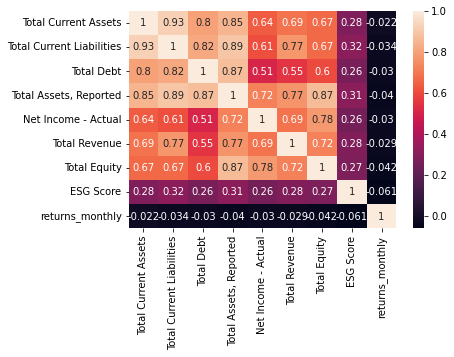

<Figure size 2880x2880 with 0 Axes>

In [13]:
cormat = df_firm[columns].corr()
sns.heatmap(cormat, annot=True)
plt.figure(figsize=(40, 40))
plt.show()

It is clear from the heatmap that none of these features are correlated among each other

In [14]:
columns = [
    "Social Pillar Score",
    "Governance Pillar Score",
    "Environmental Pillar Score",
    "ESG Score",
]

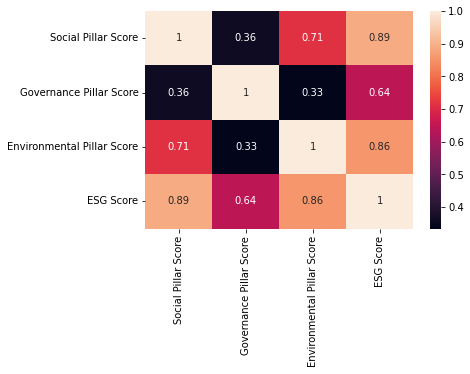

<Figure size 1440x1440 with 0 Axes>

In [15]:
cormat = df_firm[columns].corr()
sns.heatmap(cormat, annot=True)
plt.figure(figsize=(20, 20))
plt.show()

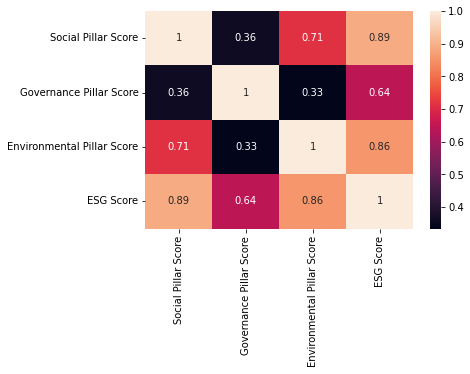

<Figure size 1440x1440 with 0 Axes>

In [16]:
cormat = df_firm[columns].corr()
sns.heatmap(cormat, annot=True)
plt.figure(figsize=(20, 20))
plt.show()

In [17]:
columns = [
    "Revenue Per Share",
    "CO2 Emissions",
    "Company Market Capitalization",
    "PPE Total",
    "P/E (Daily Time Series Ratio)",
    "ESG Score",
]

In [18]:
columns = [
    "Total Current Assets",
    "Total Current Liabilities",
    "Total Debt",
    "Total Assets, Reported",
    "Total Revenue",
    "Total Equity",
    "Net Income - Actual",
    "PPE Total",
    "Revenue Per Share",
    "CO2 Emissions",
    "Company Market Capitalization",
    "P/E (Daily Time Series Ratio)",
    "returns_monthly"
]

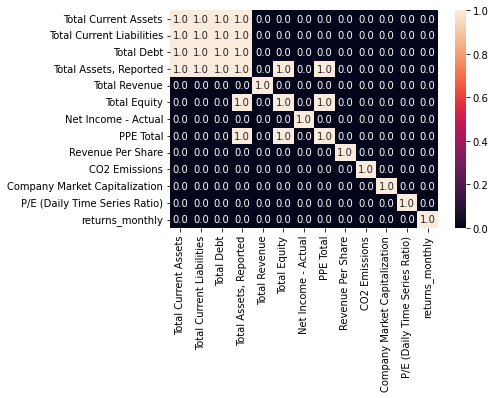

<Figure size 2160x2160 with 0 Axes>

In [19]:
cormat = df_firm[columns].corr()>=0.8
sns.heatmap(cormat, annot=True, fmt=".1f")
plt.figure(figsize=(30, 30))
plt.show()

#### Data Imputation

In [22]:
columns_to_impute = [
    "Total Current Assets",
    "Total Current Liabilities",
    "Total Debt",
    "Total Assets, Reported",
    "Net Income - Actual",
    "Revenue Per Share",
    "Total Revenue",
    "Total Equity",
    "CO2 Emissions",
    "Company Market Capitalization",
    "PPE Total",
    "P/E (Daily Time Series Ratio)",
    "returns_monthly"
]

In [23]:
df_firm = df_firm.dropna(
    subset=columns_to_impute,
    how="all",
)

In [24]:
df_firm.shape

(17762, 19)

In [27]:
print(df_firm.isna().sum())

RIC                                 0
Date                                0
Total Current Assets              725
Total Current Liabilities         725
Total Debt                         16
Total Assets, Reported             17
Net Income - Actual               658
Revenue Per Share                  46
Total Revenue                      16
Total Equity                       17
CO2 Emissions                    3354
ESG Score                           0
Social Pillar Score                 1
Governance Pillar Score             0
Environmental Pillar Score          1
Company Market Capitalization     143
PPE Total                         995
P/E (Daily Time Series Ratio)    2773
returns_monthly                     0
dtype: int64


In [28]:
df_firm[columns_to_impute] = df_firm.groupby(["RIC"])[
    columns_to_impute
].transform(lambda x: x.fillna(x.mean()))

In [29]:
df_firm.shape

(17762, 19)

In [31]:
print(df_firm.isna().sum())

RIC                                0
Date                               0
Total Current Assets             707
Total Current Liabilities        707
Total Debt                         0
Total Assets, Reported             0
Net Income - Actual              106
Revenue Per Share                  0
Total Revenue                      0
Total Equity                       0
CO2 Emissions                     15
ESG Score                          0
Social Pillar Score                1
Governance Pillar Score            0
Environmental Pillar Score         1
Company Market Capitalization      0
PPE Total                        188
P/E (Daily Time Series Ratio)    123
returns_monthly                    0
dtype: int64


In [35]:
imputer = KNNImputer(n_neighbors=5)

In [36]:
missing_cols=["Total Current Assets", "Total Current Liabilities", "Net Income - Actual", "PPE Total", "CO2 Emissions", "P/E (Daily Time Series Ratio)"]

In [37]:
imputer.fit(df_firm[missing_cols])

KNNImputer()

In [38]:
df_firm[missing_cols] = imputer.transform(df_firm[missing_cols])

In [42]:
print(df_firm.isna().sum())

RIC                              0
Date                             0
Total Current Assets             0
Total Current Liabilities        0
Total Debt                       0
Total Assets, Reported           0
Net Income - Actual              0
Revenue Per Share                0
Total Revenue                    0
Total Equity                     0
CO2 Emissions                    0
ESG Score                        0
Company Market Capitalization    0
PPE Total                        0
P/E (Daily Time Series Ratio)    0
returns_monthly                  0
dtype: int64


In [41]:
df_firm=df_firm.drop(['Environmental Pillar Score', 'Social Pillar Score', 'Governance Pillar Score'], axis =1)

#### Simple Linear Regression

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
columns_selected = [
    "Total Equity",
    "CO2 Emissions",
    "Company Market Capitalization",
    "PPE Total",
    "P/E (Daily Time Series Ratio)",
]

In [36]:
X = df_firm[columns_selected]
y = df_firm['ESG Score']

In [37]:
# rescale the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
X = scaler.fit_transform(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, y_pred))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, y_pred))

mean_squared_error :  328.77697789769456
mean_absolute_error :  14.942169409978684


In [40]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=folds)
scores  

array([0.07562335, 0.08329892, 0.09090981, 0.07984194, 0.0562524 ])

In [41]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, y_pred))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, y_pred))

mean_squared_error :  215.89389715915902
mean_absolute_error :  11.661951301406344


In [42]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=folds)
scores  

array([0.38889666, 0.3903787 , 0.38410372, 0.37048642, 0.36878969])

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, y_pred))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, y_pred))

mean_squared_error :  260.424717281312
mean_absolute_error :  13.091464698217047


In [44]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=folds)
scores  

array([0.26955122, 0.27881637, 0.26410811, 0.25695878, 0.25937093])

In [45]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, y_pred))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, y_pred))

mean_squared_error :  292.37407407220354
mean_absolute_error :  14.224496163138145


In [46]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=folds)
scores  

array([0.16400916, 0.22222271, 0.19848944, 0.16887581, 0.17274001])

In [49]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor(estimator=RandomForestRegressor())
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, y_pred))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, y_pred))


mean_squared_error :  221.85790173775806
mean_absolute_error :  11.976026808369756


In [50]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=folds)
scores  

array([0.37048366, 0.36813717, 0.36461882, 0.35927519, 0.355543  ])